# Credit Card Fraud Detection using Random Forest 

 # __IMPORT THE NECESSARY MODULES and PACKAGES !__ 

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Print Versions for sharing Projects

print(f"Pandas Version : Pandas {pd.__version__}")
print(f"Numpy Version : Numpy {np.__version__}")
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn Version : Seaborn {sns.__version__}")


Pandas Version : Pandas 0.24.2
Numpy Version : Numpy 1.17.3
Matplotlib Version : Matplotlib 3.1.0
Seaborn Version : Seaborn 0.9.0


### Importing the Dataset 

In [25]:
os.chdir('C:/Users/sabya/OneDrive/Desktop/ivy/python PM/Project module')
path_data = os.getcwd()
dataset = pd.read_csv('creditcard.csv')

### Checking head of the dataset

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

In [6]:
dataset.describe()

print("Here's the dimensions of our data frame:\n", 
     dataset.shape)


Here's the dimensions of our data frame:
 (284807, 31)


In [7]:
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Let's observe some common Data Quality Metrics

#### Null Values 

In [8]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

obervation: There are no null value in the dataset

#### Duplicate Values

In [9]:
print(len(dataset.drop_duplicates())) 
print(len(dataset[dataset.duplicated()]))

283726
1081


There are some Duplicated values present in the dataset,which we have to remove.

In [10]:
# Removing the Duplicate Values
dataset.drop_duplicates(inplace = True)
print(len(dataset))

283726


### let's check for the classes distributions

In [47]:
print('Fraud \n',dataset.Time[dataset.Class==1].describe(),'\n',
      '\n Non-Fraud \n',dataset.Time[dataset.Class==0].describe())

Fraud 
 count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64 
 
 Non-Fraud 
 count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


Imbalanced dataset. Might be worth to work on upsampling/downsampling of the data.I will use SMOTE for this.

### check the amount column

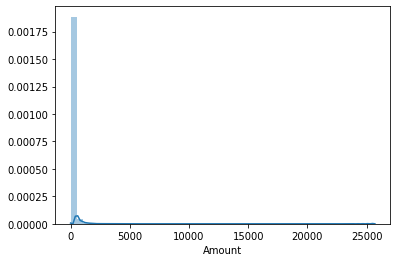

In [12]:
plt.figsize = (20,20)
sns.distplot(dataset['Amount'])
plt.show()

### check the class column

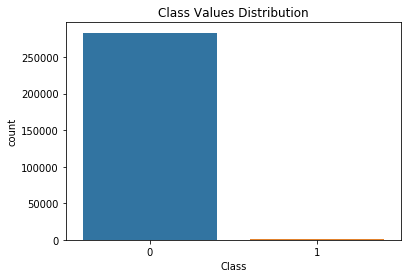

In [13]:
plt.figsize = (10,10)
sns.countplot(dataset['Class'])
plt.title('Class Values Distribution')
plt.show()

### check the Time column

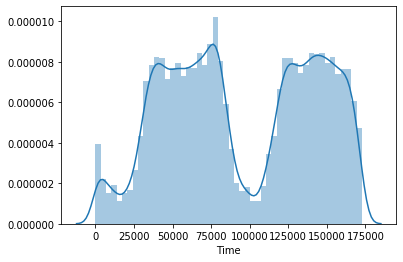

In [14]:
plt.figsize = (20,20)
sns.distplot(dataset['Time']) # No particular pattern as such , well distributed data
plt.show()

# Visualising Data for Corelation

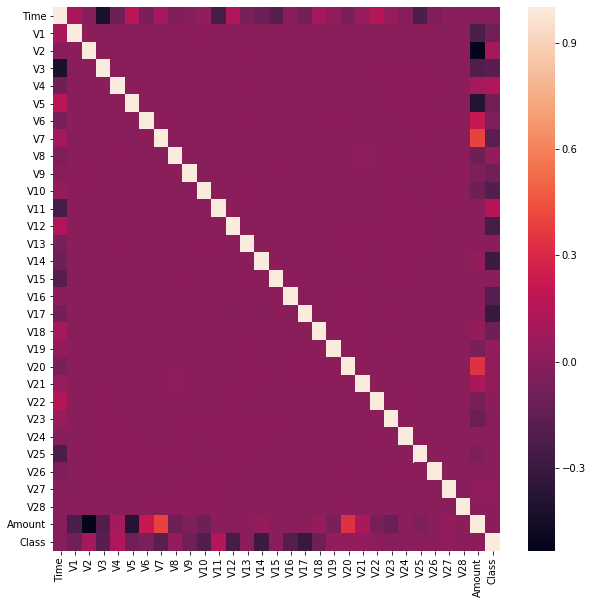

In [15]:
corr_matrix = dataset.corr()
plot = plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix) # seaborn Library
plt.show()

### Normalising the amount column. The amount column is not in line with the anonimised features

In [26]:
dataset['normAmount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1, 1))
dataset = dataset.drop(['Amount'],axis=1)


In [27]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


##  Now let's check which variable is more correlated with the fraudulent activities

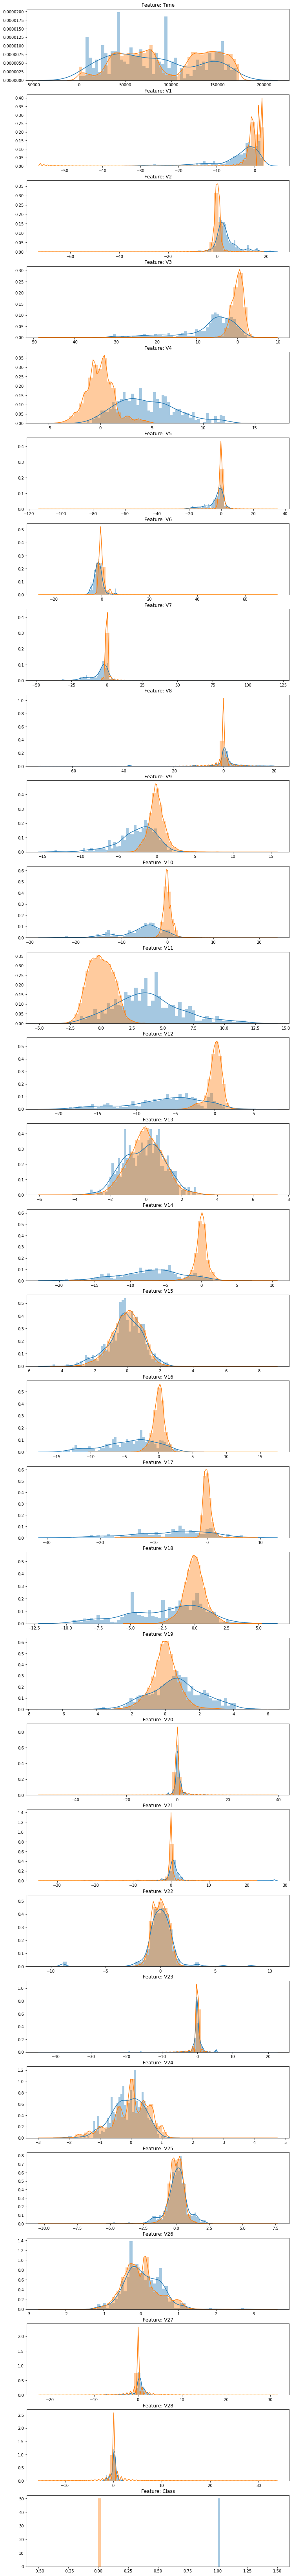

In [28]:
plt.figure(figsize=(12,30*4))
import matplotlib.gridspec as gridspec
features = dataset.iloc[:,0:30].columns
gs = gridspec.GridSpec(30, 1)
for i, feature in enumerate(dataset[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[feature][dataset.Class == 1], bins=50)
    sns.distplot(dataset[feature][dataset.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

# Machine Learning Step 1

### Remove the features that do not have significantly different distributions between the two classes (i.e. will not contribute to our model).


In [29]:
dataset2 = dataset.drop(['Time'], axis=1)

# Data preparation and general functions for plots

In [32]:
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Normal','Fraud']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))
    
    

from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

# feature selection and Split the data into training and test sets

In [34]:
X = dataset2.ix[:, dataset2.columns != 'Class']
y = dataset2.ix[:, dataset2.columns == 'Class']
#shape
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807, 1)


### spliting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Test a Random Forest model

In [36]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

pre = RandomForestClassifier(n_jobs=-1, random_state = 42)

pre.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Make predictions


In [37]:
y_pred = pre.predict(X_test)
try:
    scores = pre.decision_function(X_test)
except:
    scores = pre.predict_proba(X_test)[:,1]

### Make plots


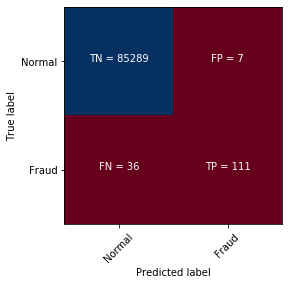

Recall=0.755 
Precision=0.941
F1=0.838
Average precision-recall score: 0.829


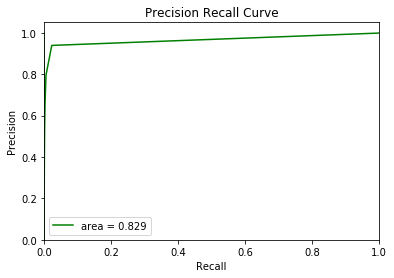

In [38]:
plot_cm(pre, y_pred)
plot_aucprc(pre, scores)

The F-1 score is not that bad! Let's try to fine tune some parameters and see if we can improve that.

# Machine Learning Step 2

# Let's try Grid search method


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [10, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : [len(X)//10000, len(X)//28000, 
                          len(X)//50000, len(X)//100000]
}

CV_rfc = GridSearchCV(estimator=pre, 
                      param_grid=param_grid, 
                      scoring = 'f1',
                      cv=10, 
                      n_jobs=10,
                      verbose=2,
                      pre_dispatch='2*n_jobs',
                      refit=False)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

### It will take some time to compute so I run this on my computer and putting the best parameters for Random Forest.

In [39]:
rfc = RandomForestClassifier(n_jobs=-1, random_state = 42,
                             n_estimators=500, 
                             max_features='auto',
                             min_samples_leaf=2,
                             criterion = 'entropy')

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Make predictions


In [40]:
y_pred1 = rfc.predict(X_test)
try:
    scores = rfc.decision_function(X_test)
except:
    scores = rfc.predict_proba(X_test)[:,1]

### Make plots


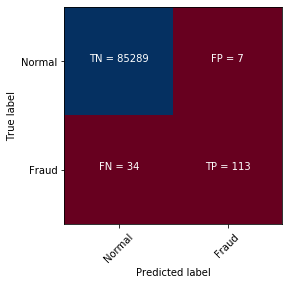

Recall=0.769 
Precision=0.942
F1=0.846
Average precision-recall score: 0.848


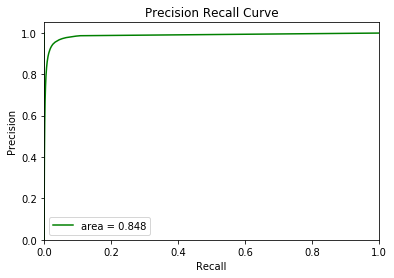

In [41]:
plot_cm(rfc, y_pred1)
plot_aucprc(rfc, scores)

Nice increase! Now let's see if I can get any better with handeling imblance dataset with SMOTE algorithm...

# Machine Learning Step 3

# Application of SMOTE for imbalace class data

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
y1=dataset2.iloc[:, -2]
X_res, y_res = smote.fit_sample(X, y1)

Using TensorFlow backend.


### spliting

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 42)


### fit the best models so far


In [44]:
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Make predictions


In [45]:
print('Classification of SMOTE-resampled dataset with optimized RF')
y_pred = rfc.predict(X_test)
try:
    scores = rfc.decision_function(X_test)
except:
    scores = rfc.predict_proba(X_test)[:,1]

Classification of SMOTE-resampled dataset with optimized RF


### Make plots

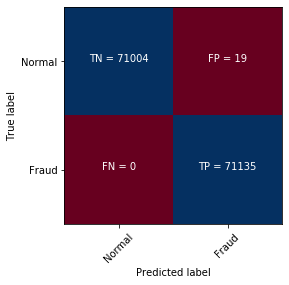

Recall=1.000 
Precision=1.000
F1=1.000
Average precision-recall score: 1.000


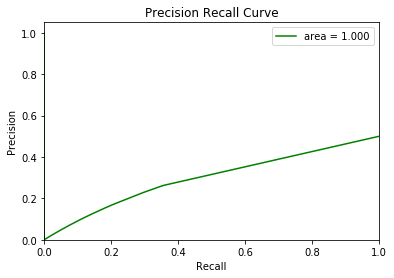

In [46]:
plot_cm(rfc, y_pred)
plot_aucprc(rfc, scores)

### if we used this new RF classifier (which parameters were optimized on the resampled dataset) on the ORIGINAL dataset, we'll get our perfect fraud analysis prediction.